# **Experiment-9. Implement k-Nearest Neighbor algorithm to classify the iris data set.**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

plt.style.use('seaborn-v0_8')
print("Libraries imported successfully!")

Libraries imported successfully!


**Loading Iris Data Set**

In [ ]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Iris Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


Iris Dataset Loaded Successfully!
Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**EDA**

In [ ]:
df.info()
print("\nMissing Values:\n", df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


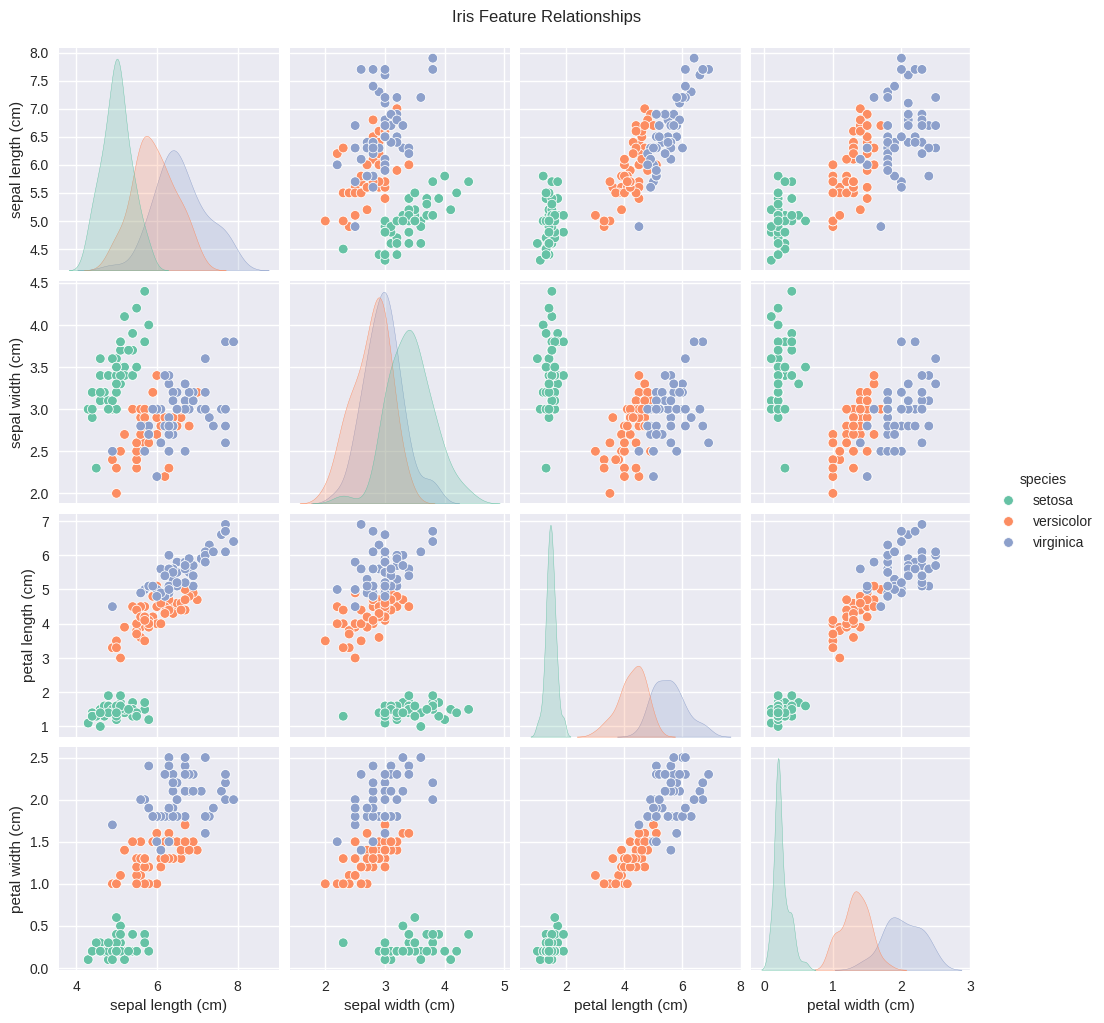

In [ ]:
sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle("Iris Feature Relationships", y=1.02)
plt.show()

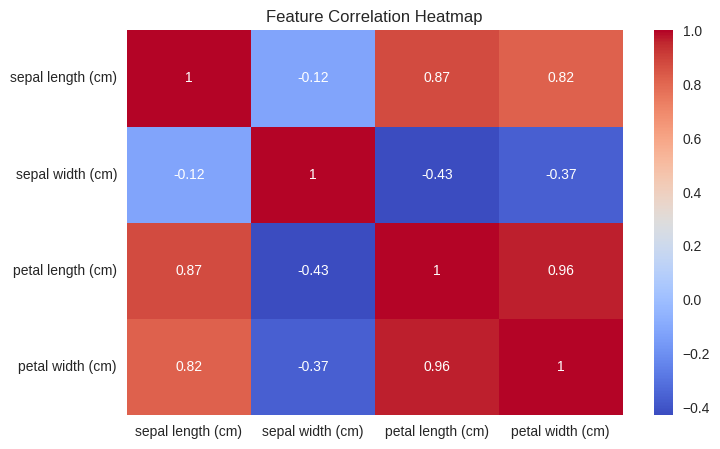

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Preparing Data for KNN**

In [ ]:
X = df.drop(columns=['species'])
y = df['species']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=102, stratify=y
)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("KNN model trained successfully!")

KNN model trained successfully!


**Evaluate Model**

In [ ]:
y_pred = knn.predict(X_test_scaled)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.867

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.80      0.80      0.80        10
   virginica       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



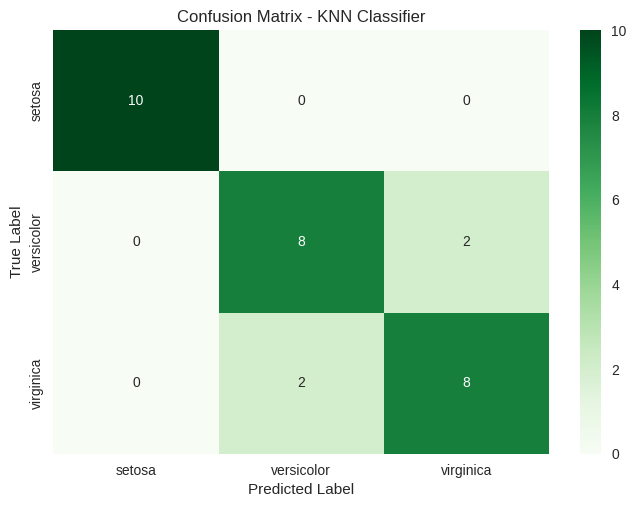

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

**Visualising Cluster**

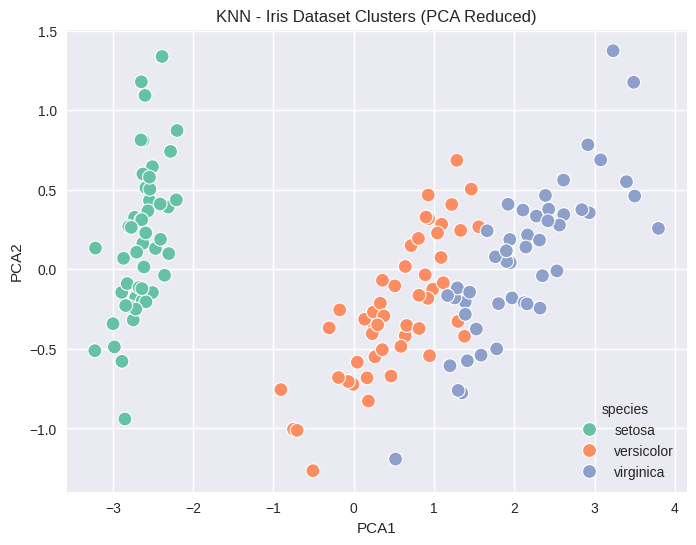

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['species'] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=pca_df, palette='Set2', s=100)
plt.title("KNN - Iris Dataset Clusters (PCA Reduced)")
plt.show()

**Predicting New Sample**

In [ ]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # Example: typical Setosa features
sample_scaled = scaler.transform(sample)
pred = knn.predict(sample_scaled)[0]

print(f"🌸 The predicted species for the new sample is: **{pred.upper()}**")

🌸 The predicted species for the new sample is: **SETOSA**


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
